# Sketchbook for galaxy plotter

Here you will find a quickly written program to handle galaxy data, from download to encode.

You will need to install mw_plot, make sure to load a proper environment and then follow the instr



In [3]:
!pip install mw_plot

In [2]:
import numpy as np
from astropy import units as u
from mw_plot import MWFaceOn

mw1 = MWFaceOn(
    radius=20 * u.kpc,
    unit=u.kpc,
    coord="galactocentric",
    annotation=True,
    figsize=(10, 8),
)

mw1.title = "Bird's Eyes View"

mw1.scatter(8 * u.kpc, 0 * u.kpc, c="r", s=2)

ImportError: Bokeh is not installed. Please install Bokeh to use this feature

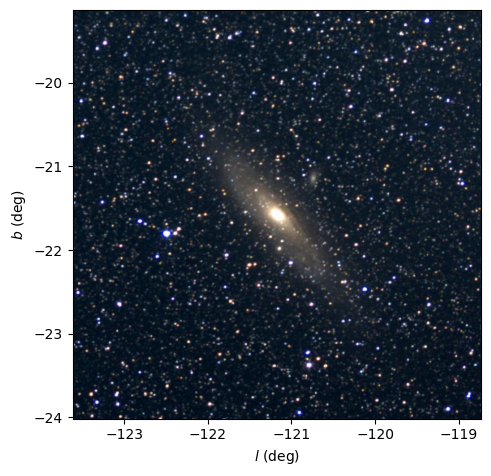

In [38]:
import matplotlib.pyplot as plt

from astropy import units as u

from mw_plot import MWSkyMap

mw1 = MWSkyMap(
    center="M31",
    radius=(8800, 8800) * u.arcsec,
    background="Mellinger color optical survey",
)

fig, ax = plt.subplots(figsize=(5, 5))

mw1.transform(ax)

mw1.savefig('galaxy.png')

In [64]:

def plt2rgbarr(fig):
    """
    A function to transform a matplotlib to a 3d rgb np.array 

    Input
    -----
    fig: matplotlib.figure.Figure
        The plot that we want to encode.        

    Output
    ------
    np.array(ndim, ndim, 3): A 3d map of each pixel in a rgb encoding (the three dimensions are x, y, and rgb)
    
    """
    fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
    fig.canvas.draw()
    rgba_buf = fig.canvas.buffer_rgba()
    w, h = fig.canvas.get_width_height()
    rgba_arr = np.frombuffer(rgba_buf, dtype=np.uint8).reshape((h, w, 4))
    return rgba_arr[:, :, :3]


In [65]:
# remove padding around the axes and generate a 2d np.array

img_array = plt2rgbarr(fig)
print(img_array.shape)  


(500, 500, 3)


In [66]:
# A grey encoding
grey = np.sum(img_array[: , : , :] * np.array([0.299, 0.587, 0.114]), axis=2)  # From RGB to grey
x, y = [], []
for ig, g in enumerate(grey):
    for ij, j in enumerate(g):
        if j > 230:
            x.append(ig)
            y.append(ij)
    

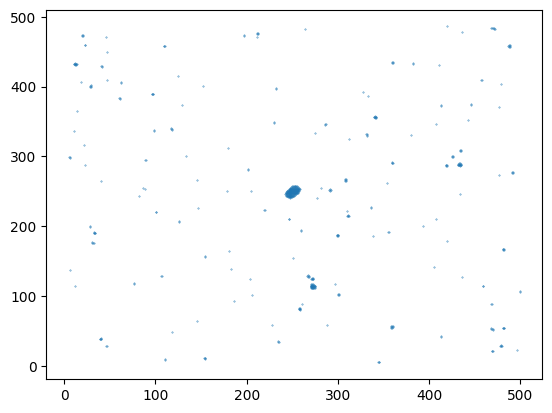

In [67]:
plt.scatter(x, y, s=0.1)